# Bike Sharing Assignment 

### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

#### The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### what are the plan for solving this
- To create a linear regression model that will predict the demand the shared bike based on the given data set

## Step 1: Reading and Understanding the Data

- as a first step lets import the data set and have a look at data 

In [150]:
# import all the required libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [151]:
# lets read the data set 
bikesharingDataSet = pd.read_csv("day.csv")

In [152]:
# now lets have a first look on the data set 
bikesharingDataSet.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [153]:
# lets check the shape and try to find the column type
bikesharingDataSet.shape

(730, 16)

In [154]:
bikesharingDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [155]:
bikesharingDataSet['yr'] = pd.to_numeric(bikesharingDataSet['yr'])

In [156]:
# now lets chjeck if any column contains null values 
bikesharingDataSet.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- clearly we don't have any column with null values

lets check discribe method on the data set 

In [157]:
# discription of the given data set
bikesharingDataSet.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data Preparation 

## Now lets check if there are any columns not required as per the Dataset Dictionary 
- The variable 'casual' indicates the number casual users who have made a rental. 
- also we have The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day.


In [158]:
bikesharingDataSet.drop(['casual','registered'],axis=1,inplace=True)
# lets check the shape after removing these column initially we had (730, 16)
bikesharingDataSet.shape

(730, 14)

#### Since cnt variable has count of total rental bikes including both casual and registered we can remove 
- Next we have 'instant' column which has only index so we can also remove this
- 'dteday' is a column which has date but since we have year and month we can ignore this column
#### finaly lets remove these 4 columns from our data set

In [159]:
bikesharingDataSet.drop(['instant','dteday'],axis=1,inplace=True)
# After removing casual and registered column shape was (730, 16) lets check it now
bikesharingDataSet.shape

(730, 12)

#### From Data dictionary we can see that there are some categorical variables with has numeric values which doesn't make any sence. let convert these numeric values to correspondoing lables for better Data Visualization  


In [160]:
# first lets take a look at data set and fidn such columns

bikesharingDataSet.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


- 'seasion' asper the data dictionary season has values (1:spring, 2:summer, 3:fall, 4:winter)
- 'yr' column represents year and it has year (0: 2018, 1:2019)
- 'mnth' has numeric values month ( 1 to 12)
- 'weekday' : day of the week(from monday to sunday)
- 'workingday' : if day is neither weekend nor holiday is 1, otherwise is 0.
- 'weathersit' : 
		 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [161]:
# before mapping the categorical values with lable let give the proper names to column with improper naming
bikesharingDataSet.rename(columns={'yr':'year','mnth':'month','hum':'humidity','weathersit':'weathersituation'}, inplace=True)


In [162]:
# change year to mapping lable
bikesharingDataSet.year = bikesharingDataSet.year.map({0:'2018', 1:'2019'})

# change seasion to mapping lable
bikesharingDataSet['season'] = bikesharingDataSet['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# change month to mapping lable 
bikesharingDataSet['month'] = bikesharingDataSet['month'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# change weekday to mapping lable
bikesharingDataSet['weekday'] = bikesharingDataSet['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

# change weathersit to mapping lable
bikesharingDataSet['weathersituation'] = bikesharingDataSet['weathersituation'].map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})
# change seasion to mapping lable

In [163]:
bikesharingDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            730 non-null    object 
 1   year              730 non-null    object 
 2   month             730 non-null    object 
 3   holiday           730 non-null    int64  
 4   weekday           730 non-null    object 
 5   workingday        730 non-null    int64  
 6   weathersituation  730 non-null    object 
 7   temp              730 non-null    float64
 8   atemp             730 non-null    float64
 9   humidity          730 non-null    float64
 10  windspeed         730 non-null    float64
 11  cnt               730 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 68.6+ KB


# now lets have Data Visualization 

In [164]:
# lets Analize the categorical columns against our Target variable
import matplotlib.pyplot as plt
import seaborn as sns

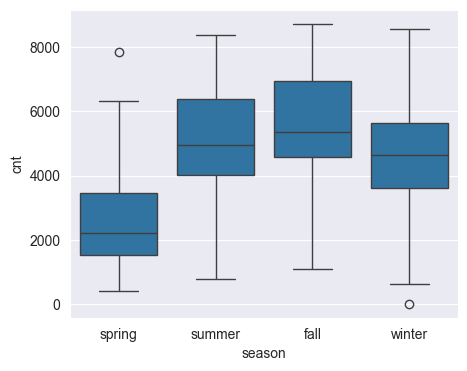

In [165]:
# lets see if Seasion has any dependency with target variable
plt.figure(figsize=(5, 4))
sns.boxplot(x = 'season', y = 'cnt', data = bikesharingDataSet)
plt.show()

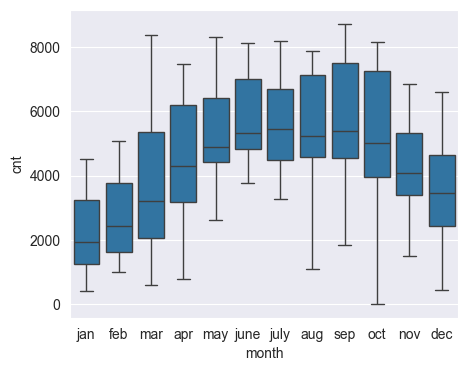

In [166]:
plt.figure(figsize=(5, 4))
sns.boxplot(x = 'month', y = 'cnt', data = bikesharingDataSet)
plt.show()

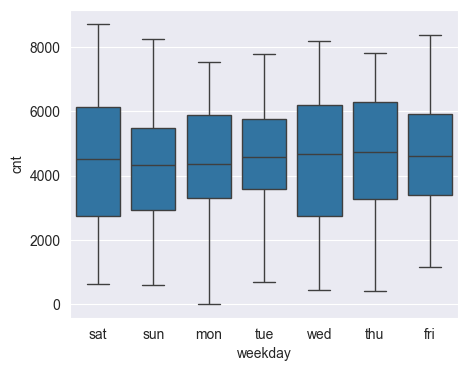

In [167]:
plt.figure(figsize=(5, 4))
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharingDataSet)
plt.show()

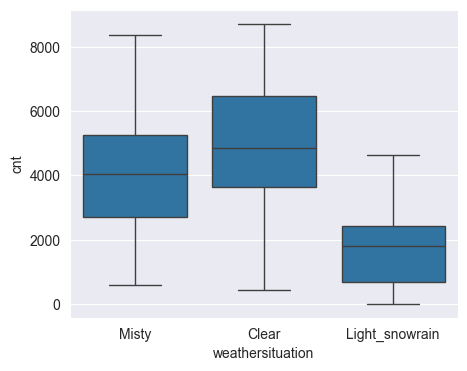

In [168]:
plt.figure(figsize=(5, 4))
sns.boxplot(x = 'weathersituation', y = 'cnt', data = bikesharingDataSet)
plt.show() 

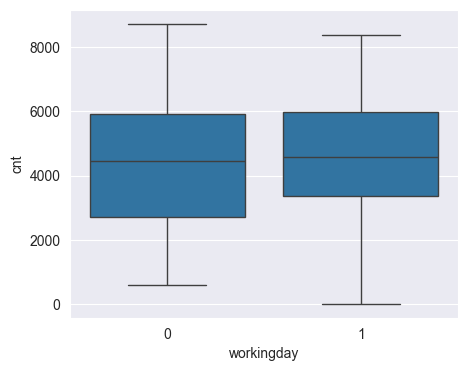

In [169]:
plt.figure(figsize=(5, 4))
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharingDataSet)
plt.show()

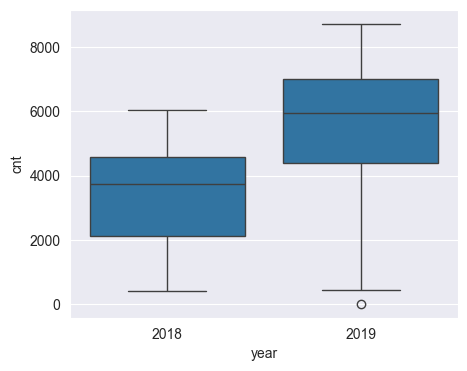

In [170]:
plt.figure(figsize=(5, 4))
sns.boxplot(x = 'year', y = 'cnt', data = bikesharingDataSet)
plt.show()

- This shows that there is an increase in Bike rental from 2018 to 2019 

In [171]:
bikesharingDataSet.head()

,season,year,month,holiday,weekday,workingday,weathersituation,temp,atemp,humidity,windspeed,cnt
0,spring,2018,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


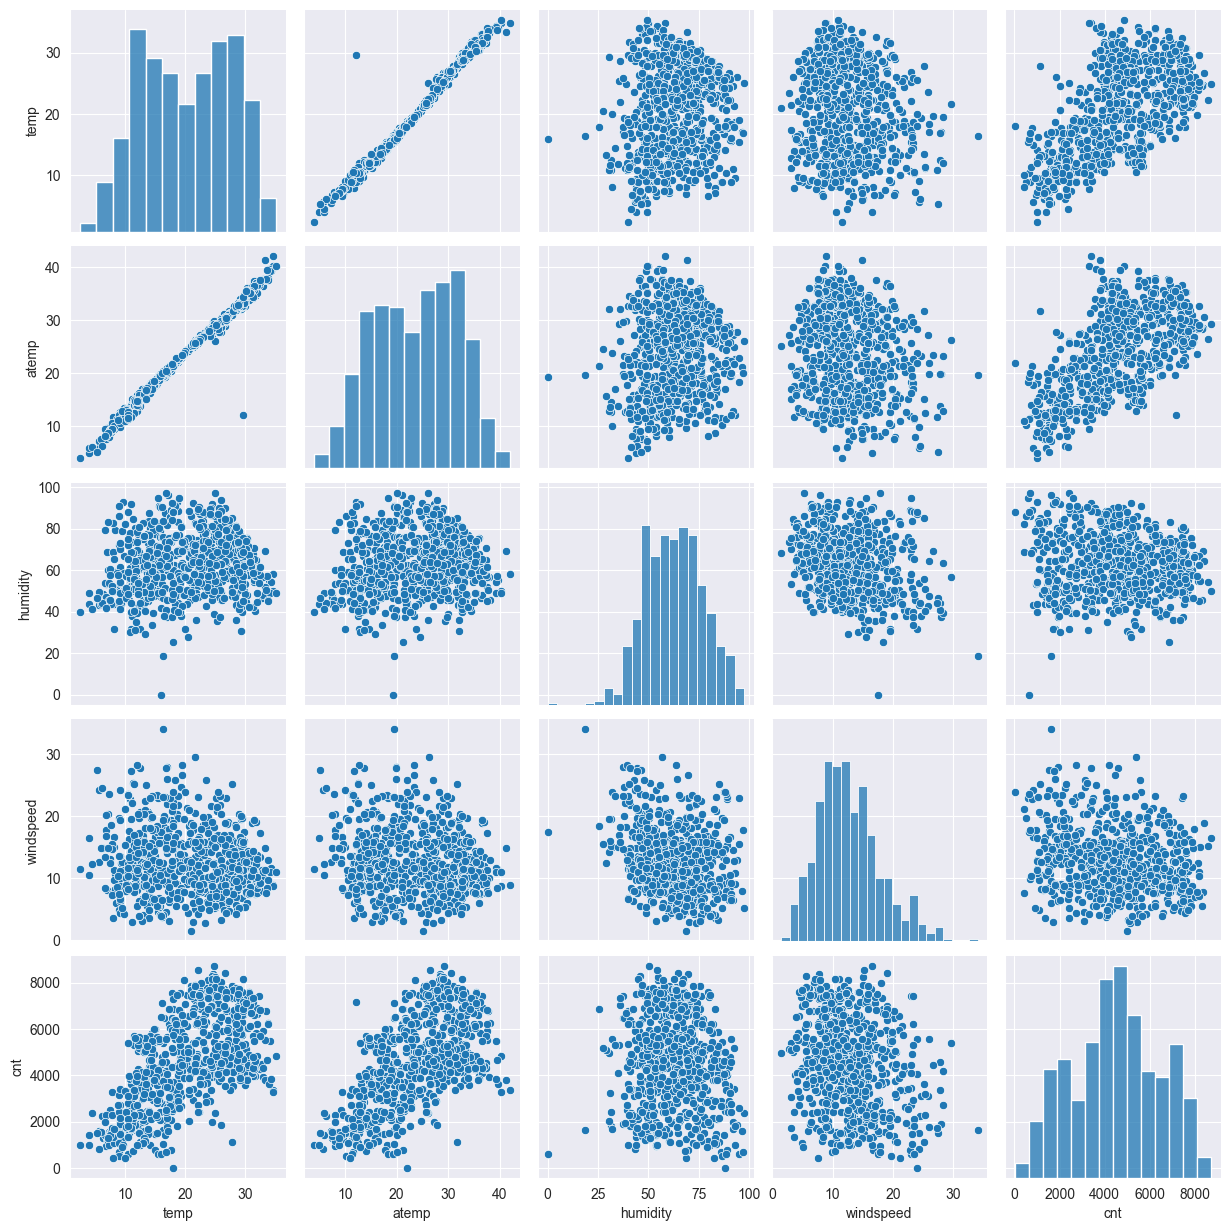

In [172]:
# now that we have visualized categorical variables lets have a look at Continues variables

sns.pairplot(data = bikesharingDataSet , vars = [ 'temp','atemp','humidity','windspeed','cnt' ])
plt.show()

In [173]:
# now lets check correlation between the numerical variables 

bikesharingDataSet[['temp','atemp','humidity','windspeed','cnt']].corr()

,temp,atemp,humidity,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


- Above table shows strong relation between temp and atemp will may lead to multicolinearity. so we need to use either one of them

## let plot a heatmap and visualize the correlation for continues variables

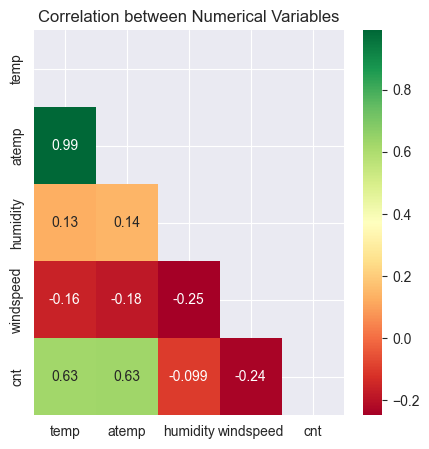

In [174]:
plt.figure(figsize = (5,5))
matrix = np.triu(bikesharingDataSet[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(bikesharingDataSet[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

# Now lets create Dummy Variables 

In [175]:
bikesharingDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            730 non-null    object 
 1   year              730 non-null    object 
 2   month             730 non-null    object 
 3   holiday           730 non-null    int64  
 4   weekday           730 non-null    object 
 5   workingday        730 non-null    int64  
 6   weathersituation  730 non-null    object 
 7   temp              730 non-null    float64
 8   atemp             730 non-null    float64
 9   humidity          730 non-null    float64
 10  windspeed         730 non-null    float64
 11  cnt               730 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 68.6+ KB


In [176]:
# lets take seaion, month, weekday and weathersituation for creating dummy variables
seasons_dumdata=pd.get_dummies(bikesharingDataSet.season,drop_first=True)
months_dumdata=pd.get_dummies(bikesharingDataSet.month,drop_first=True)
weekdays_dumdata=pd.get_dummies(bikesharingDataSet.weekday,drop_first=True)
weathersituation_dumdata=pd.get_dummies(bikesharingDataSet.weathersituation,drop_first=True)

In [177]:
# now lets merge these dummy variable to our data set

bikesharingDataSet = pd.concat([bikesharingDataSet,seasons_dumdata, months_dumdata,weekdays_dumdata,weathersituation_dumdata],axis=1)

In [178]:
bikesharingDataSet.head()

,season,year,month,holiday,weekday,workingday,weathersituation,temp,atemp,humidity,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
0,spring,2018,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,False,False,False,True,False,False,False,False,False,True
1,spring,2018,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,False,False,False,False,True,False,False,False,False,True
2,spring,2018,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,False,False,True,False,False,False,False,False,False,False
3,spring,2018,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,False,False,False,False,False,False,True,False,False,False
4,spring,2018,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,False,False,False,False,False,False,False,True,False,False


In [179]:
bikesharingDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            730 non-null    object 
 1   year              730 non-null    object 
 2   month             730 non-null    object 
 3   holiday           730 non-null    int64  
 4   weekday           730 non-null    object 
 5   workingday        730 non-null    int64  
 6   weathersituation  730 non-null    object 
 7   temp              730 non-null    float64
 8   atemp             730 non-null    float64
 9   humidity          730 non-null    float64
 10  windspeed         730 non-null    float64
 11  cnt               730 non-null    int64  
 12  spring            730 non-null    bool   
 13  summer            730 non-null    bool   
 14  winter            730 non-null    bool   
 15  aug               730 non-null    bool   
 16  dec               730 non-null    bool   
 1

In [180]:
# we now have 34 in total column 
# since we have created dummy variables for categorical variables lets delete these categorical variables 
bikesharingDataSet.drop(['season','month','weekday','weathersituation'], axis = 1, inplace = True)

In [181]:
bikesharingDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    object 
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   spring          730 non-null    bool   
 9   summer          730 non-null    bool   
 10  winter          730 non-null    bool   
 11  aug             730 non-null    bool   
 12  dec             730 non-null    bool   
 13  feb             730 non-null    bool   
 14  jan             730 non-null    bool   
 15  july            730 non-null    bool   
 16  june            730 non-null    bool   
 17  mar             730 non-null    boo

- now we have 29 columns

In [182]:

bikesharingDataSet['year'] = pd.to_numeric(bikesharingDataSet['year'])

## Splitting the Data into Training and Testing Sets

In [183]:
# We specify this so that the train and test data set always have the same rows, respectively
from sklearn.model_selection import train_test_split
bike_train, bike_test = train_test_split(bikesharingDataSet, train_size = 0.7, test_size = 0.3, random_state = 100)

In [184]:
bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
653,2019,0,1,19.201653,23.0423,55.8333,12.208807,7534,False,False,...,True,False,False,False,False,False,True,False,False,False
576,2019,0,1,29.246653,33.1448,70.4167,11.083475,7216,False,False,...,False,False,False,False,False,False,True,False,False,False
426,2019,0,0,16.980847,20.6746,62.1250,10.792293,4066,True,False,...,False,False,False,True,False,False,False,False,False,True
728,2019,0,0,10.489153,11.5850,48.3333,23.500518,1796,True,False,...,False,False,False,False,True,False,False,False,False,False
482,2019,0,0,15.443347,18.8752,48.9583,8.708325,4220,False,True,...,False,False,False,True,False,False,False,False,False,True


In [185]:
bike_test.shape

(219, 30)

### Rescaling the Features
We will use MinMax scaling.

In [186]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [187]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','humidity','windspeed','cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
653,2019,0,1,0.509887,23.0423,0.575354,0.300794,0.864243,False,False,...,True,False,False,False,False,False,True,False,False,False
576,2019,0,1,0.815169,33.1448,0.725633,0.264686,0.827658,False,False,...,False,False,False,False,False,False,True,False,False,False
426,2019,0,0,0.442393,20.6746,0.640189,0.255342,0.465255,True,False,...,False,False,False,True,False,False,False,False,False,True
728,2019,0,0,0.245101,11.5850,0.498067,0.663106,0.204096,True,False,...,False,False,False,False,True,False,False,False,False,False
482,2019,0,0,0.395666,18.8752,0.504508,0.188475,0.482973,False,True,...,False,False,False,True,False,False,False,False,False,True


In [188]:
# describing the dataset

bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
653,2019,0,1,0.509887,23.0423,0.575354,0.300794,0.864243,False,False,...,True,False,False,False,False,False,True,False,False,False
576,2019,0,1,0.815169,33.1448,0.725633,0.264686,0.827658,False,False,...,False,False,False,False,False,False,True,False,False,False
426,2019,0,0,0.442393,20.6746,0.640189,0.255342,0.465255,True,False,...,False,False,False,True,False,False,False,False,False,True
728,2019,0,0,0.245101,11.5850,0.498067,0.663106,0.204096,True,False,...,False,False,False,False,True,False,False,False,False,False
482,2019,0,0,0.395666,18.8752,0.504508,0.188475,0.482973,False,True,...,False,False,False,True,False,False,False,False,False,True


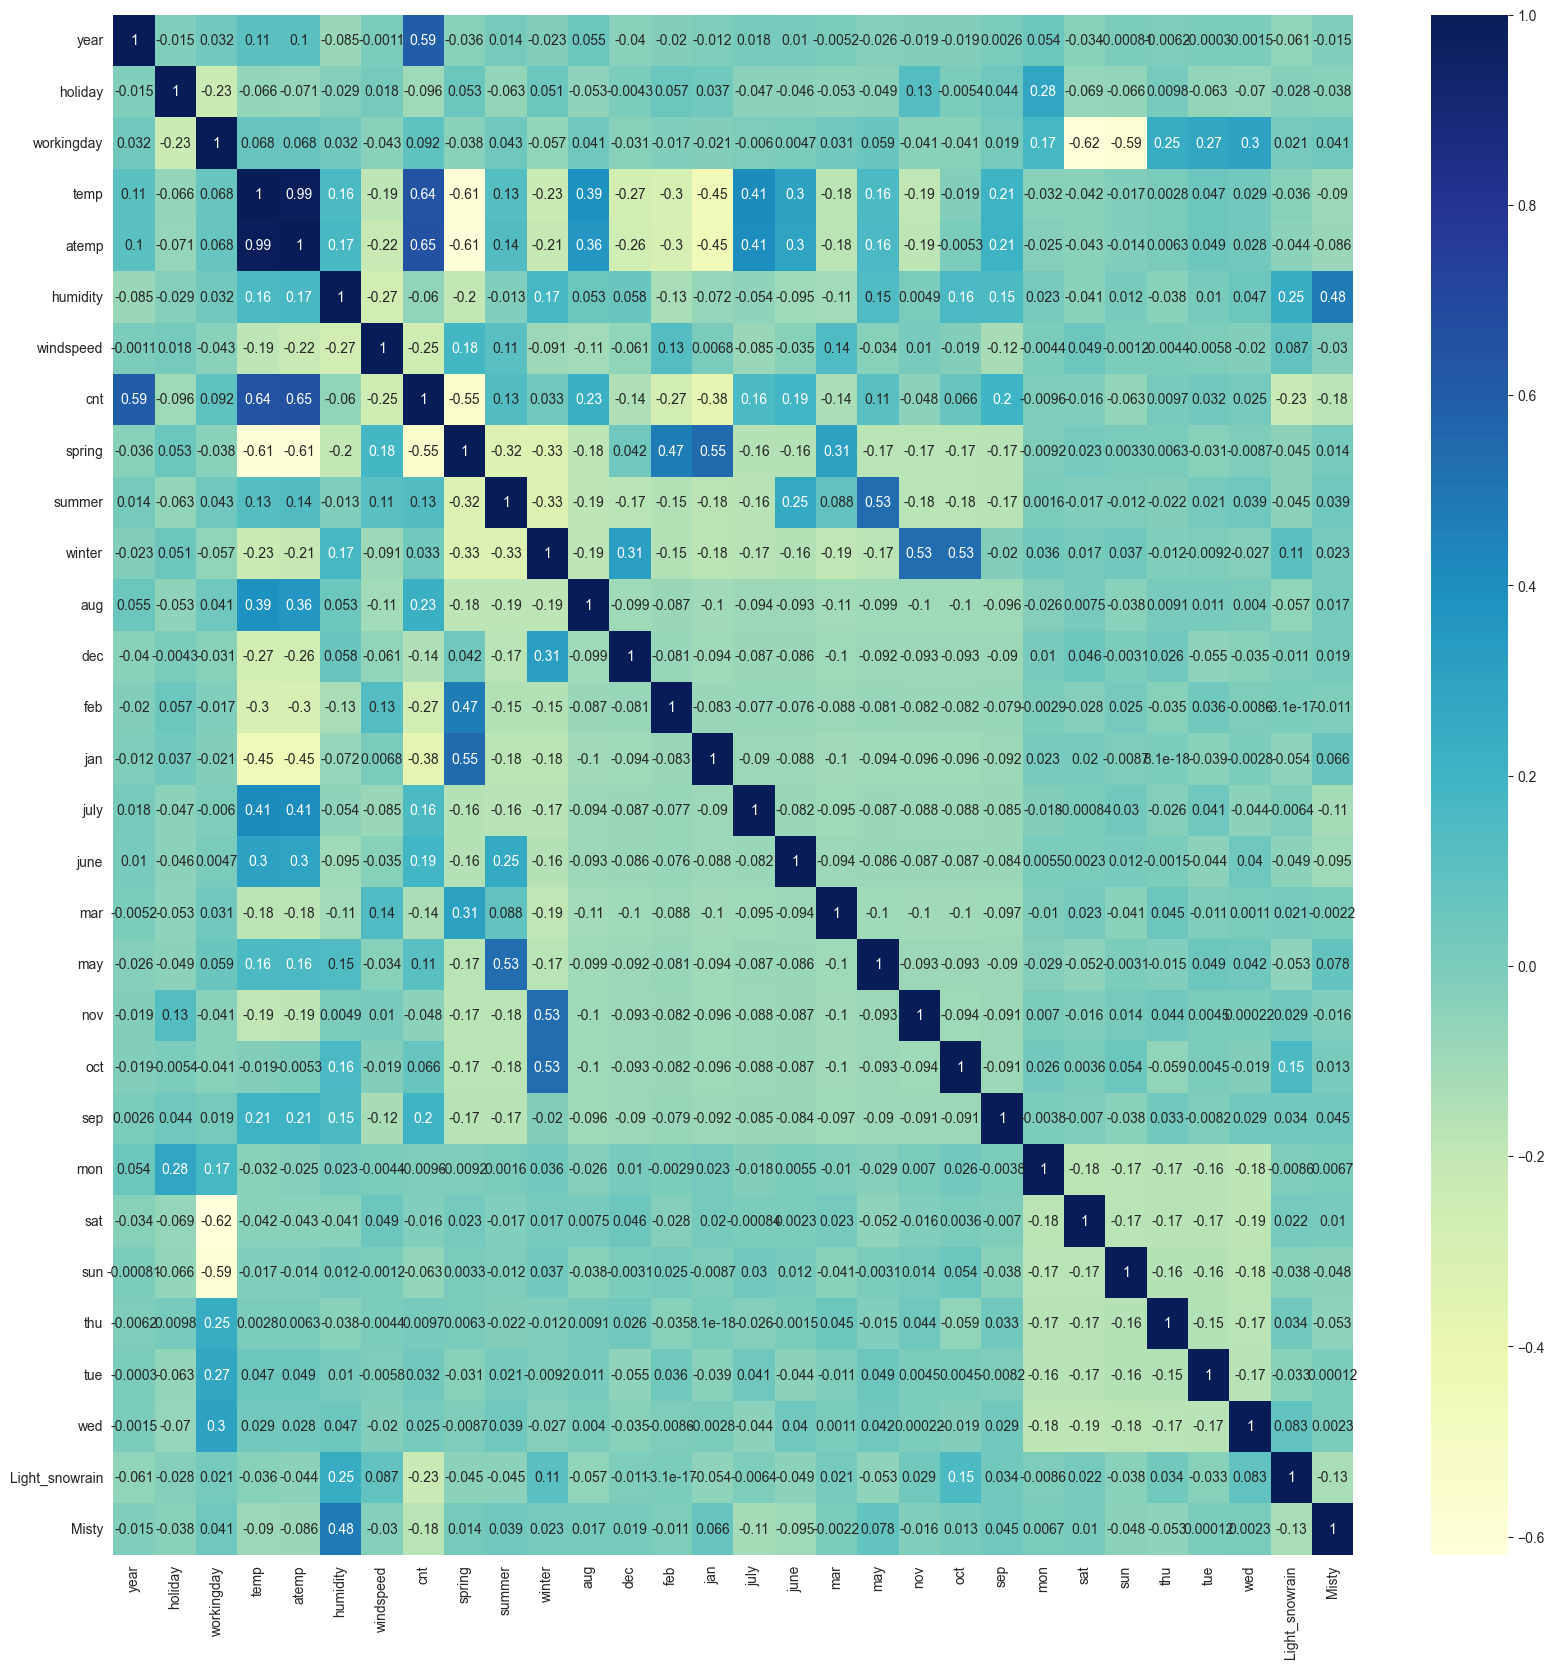

In [189]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 20))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


In [190]:
bike_train.head()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
653,2019,0,1,0.509887,23.0423,0.575354,0.300794,0.864243,False,False,...,True,False,False,False,False,False,True,False,False,False
576,2019,0,1,0.815169,33.1448,0.725633,0.264686,0.827658,False,False,...,False,False,False,False,False,False,True,False,False,False
426,2019,0,0,0.442393,20.6746,0.640189,0.255342,0.465255,True,False,...,False,False,False,True,False,False,False,False,False,True
728,2019,0,0,0.245101,11.5850,0.498067,0.663106,0.204096,True,False,...,False,False,False,False,True,False,False,False,False,False
482,2019,0,0,0.395666,18.8752,0.504508,0.188475,0.482973,False,True,...,False,False,False,True,False,False,False,False,False,True


#### As you might have noticed, cnt seems to be correlated to temp the most. Let's see a pairplot for cnt vs temp.

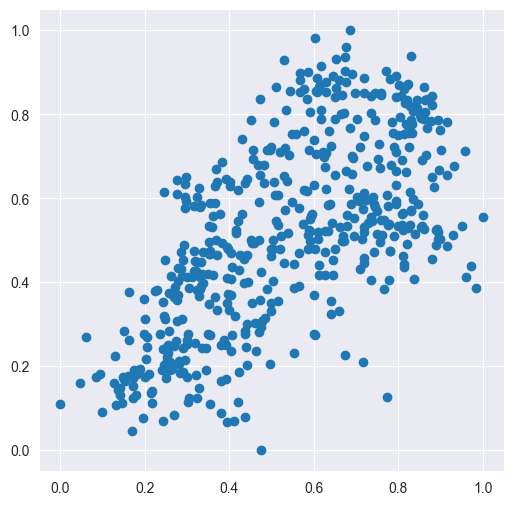

In [191]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(bike_train.temp, bike_train.cnt)
plt.show()

# Dividing into X and Y sets for the model building

In [192]:
bike_train.dtypes

year                int64
holiday             int64
workingday          int64
temp              float64
atemp             float64
humidity          float64
windspeed         float64
cnt               float64
spring               bool
summer               bool
winter               bool
aug                  bool
dec                  bool
feb                  bool
jan                  bool
july                 bool
june                 bool
mar                  bool
may                  bool
nov                  bool
oct                  bool
sep                  bool
mon                  bool
sat                  bool
sun                  bool
thu                  bool
tue                  bool
wed                  bool
Light_snowrain       bool
Misty                bool
dtype: object

In [193]:
# Building the Linear Model

y_train = bike_train.pop('cnt')
X_train = bike_train

In [194]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [195]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [196]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 14),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 3),
 ('dec', False, 13),
 ('feb', False, 11),
 ('jan', False, 12),
 ('july', True, 1),
 ('june', False, 7),
 ('mar', False, 15),
 ('may', False, 4),
 ('nov', False, 10),
 ('oct', False, 2),
 ('sep', True, 1),
 ('mon', False, 5),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 8),
 ('tue', False, 6),
 ('wed', False, 9),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1)]

In [197]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'spring', 'summer', 'winter', 'july', 'sep', 'sat', 'sun',
       'Light_snowrain', 'Misty'],
      dtype='object')

In [198]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [199]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [200]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [201]:
print(X_train_rfe.isnull().sum())
print(y_train.isnull().sum())

# Drop rows with NaN values, or fill them with a suitable value
X_train_rfe = X_train_rfe.dropna()
y_train = y_train.dropna()

const             0
year              0
holiday           0
workingday        0
temp              0
humidity          0
windspeed         0
spring            0
summer            0
winter            0
july              0
sep               0
sat               0
sun               0
Light_snowrain    0
Misty             0
dtype: int64
0


In [202]:
X_train_rfe.dtypes

const             float64
year                int64
holiday             int64
workingday          int64
temp              float64
humidity          float64
windspeed         float64
spring               bool
summer               bool
winter               bool
july                 bool
sep                  bool
sat                  bool
sun                  bool
Light_snowrain       bool
Misty                bool
dtype: object

In [203]:
X_train_rfe1 = X_train_rfe.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)


In [204]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [205]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.13e-191
Time:                        20:57:33   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -370.6902     12.944    -28.

#### all the p-values are less than 0.05 lets check the VIF 

## Checking VIF

In [206]:
#Drop the constant term B0
X_train_rfe2 = X_train_rfe1.drop(['const'], axis=1)

In [207]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,11409204.76
11,sat,2612418.89
12,sun,2414116.60
1,holiday,429893.50
6,spring,5.02
3,temp,3.62
8,winter,3.49
7,summer,2.61
4,humidity,1.91
14,Misty,1.57


In [208]:
# clearly workingday has the highest VIF lets remove this variable
#Drop January
X_train_new1 = X_train_rfe2.drop(["workingday"], axis = 1)

In [209]:
# again build a new model with new X_train value
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.13e-191
Time:                        20:57:33   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -463.3288     16.180    -28.

##### now the p-value for sat is 0.371 which is higher than 0.05 lets check the VIF  for this new model data

In [210]:
#Drop the constant term B0
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [211]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,year,74.05
3,humidity,39.42
2,temp,23.68
5,spring,6.60
4,windspeed,5.47
7,winter,4.63
6,summer,3.46
13,Misty,2.39
8,july,1.61
9,sep,1.41


In [212]:
# sat variable has high p-value and low VIF let remove this variable
#Drop sat
X_train_new2 = X_train_lm1.drop(["humidity"], axis = 1)

In [213]:
# again lets build a new model without sat variable 
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          5.73e-189
Time:                        20:57:33   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -471.2528     16.349    -28.

In [214]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [215]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,year,52.89
2,temp,22.31
4,spring,6.53
3,windspeed,5.01
6,winter,4.46
5,summer,3.43
7,july,1.60
12,Misty,1.59
8,sep,1.40
9,sat,1.24


In [216]:
# lets remove the spring variable this time as its VIF is 6.53
#Drop the spring column
X_train_new3=X_train_lm2.drop(['spring'],axis=1)

In [217]:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.2
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          4.92e-188
Time:                        20:57:34   Log-Likelihood:                 503.63
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     497   BIC:                            -926.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -468.6588     16.473    -28.

In [218]:
#Drop constant 
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [219]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,year,16.75
2,temp,9.89
3,windspeed,4.98
4,summer,1.76
5,winter,1.66
11,Misty,1.59
6,july,1.54
7,sep,1.29
8,sat,1.24
9,sun,1.22


In [220]:
# now lets remove the spring variable as its VIF higher than 6.53
#Drop the spring column
X_train_new4=X_train_lm3.drop(['holiday'],axis=1)

In [221]:
# Adding a constant variable 
X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.2
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.08e-185
Time:                        20:57:34   Log-Likelihood:                 495.26
No. Observations:                 510   AIC:                            -966.5
Df Residuals:                     498   BIC:                            -915.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -469.5921     16.727    -28.

In [222]:
#Drop constant 
X_train_lm4=X_train_lm4.drop(['const'],axis=1)

In [223]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,year,16.60
1,temp,9.86
2,windspeed,4.98
3,summer,1.75
4,winter,1.66
10,Misty,1.59
5,july,1.54
6,sep,1.29
7,sat,1.23
8,sun,1.21


In [224]:
# july p-value is high lets try to remove and test
#Drop the windspeed column
X_train_new5=X_train_lm4.drop(['sat'],axis=1)

In [225]:
# Adding a constant variable 
X_train_lm5 = sm.add_constant(X_train_new5)
lm5 = sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.2
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.69e-186
Time:                        20:57:34   Log-Likelihood:                 494.31
No. Observations:                 510   AIC:                            -966.6
Df Residuals:                     499   BIC:                            -920.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -468.9122     16.735    -28.

In [226]:
#Drop constant 
X_train_lm5=X_train_lm5.drop(['const'],axis=1)

In [227]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,year,16.35
1,temp,9.85
2,windspeed,4.97
3,summer,1.75
4,winter,1.66
9,Misty,1.59
5,july,1.54
6,sep,1.29
7,sun,1.18
8,Light_snowrain,1.08


- We have Prob(F-statistic) is very low Which tells Overall model is a good Fit.

- We got quite Good Adjusted R2 Score i.e 83.3%

- All the P Value are less than 0.05, Which say that all the 14 Features are Statistically Significant

- Hence we can go ahaed with the current Model for Prediction and Evaluation.

## Residual Analysis

In [228]:
# Calculation of Error in Prediction for Training Data
X_train_lm5 = sm.add_constant(X_train_lm5)
y_train_pred = lm5.predict(X_train_lm5)
res = (y_train - y_train_pred)

Text(0.5, 0, 'Errors')

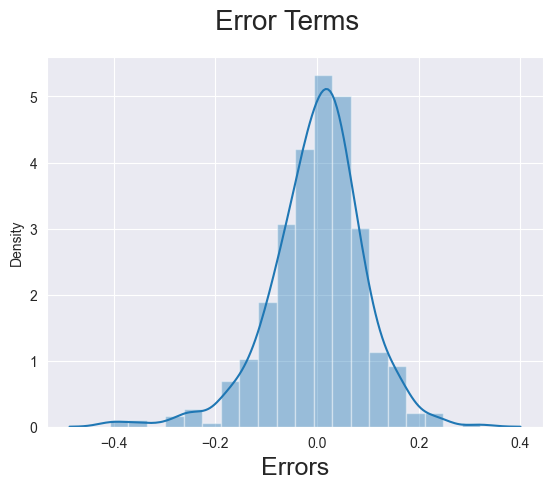

In [229]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

### We can see Error Terms are normally Distributed with mean Zero. Hence Model is Actaully obeying the assumption of Normality.

### Looking for patterns in the residuals

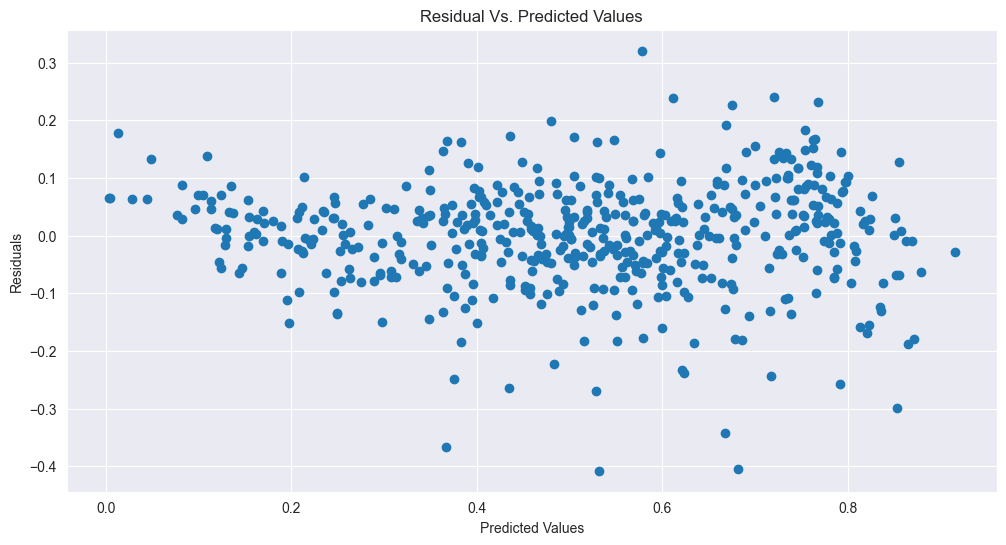

In [230]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#### **We can see there is no specific Pattern observed in the Error Terms with respect to Prediction, hence we can say Error terms are independent of each other.**

## Looking for Constant Variance

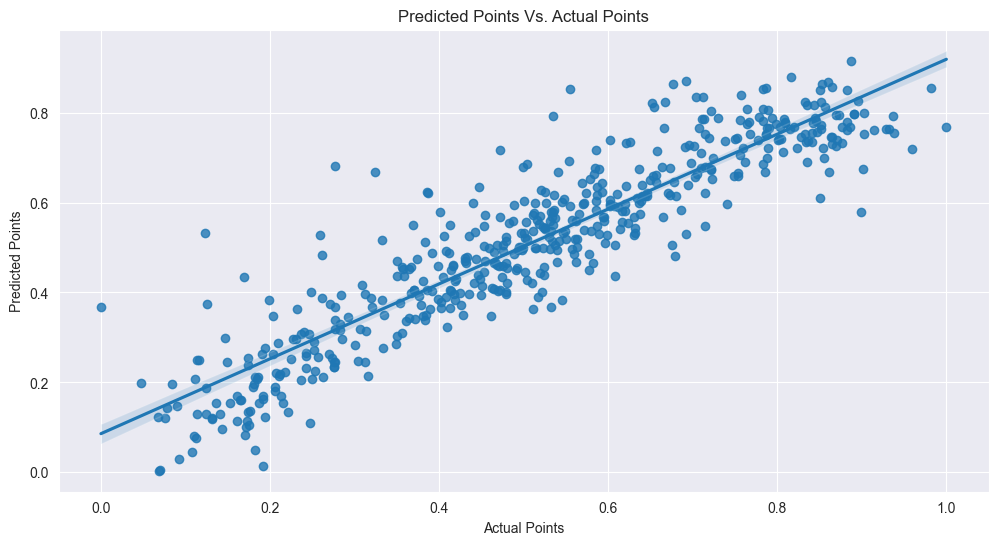

In [231]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

#### We can see Error Terms have approximatly a Constant Variance, Hence it follows the Assumption of Homoscedasticity

## Model Evaluation on Test Dataset

#### Applying the MinMax scaling on the test sets

In [232]:
num_vars = ['temp','humidity','windspeed','cnt']

bike_test[num_vars]=scaler.transform(bike_test[num_vars])

y_test = bike_test.pop('cnt')
X_test = bike_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,year,holiday,workingday,temp,atemp,humidity,windspeed,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
184,1.0,2018,1,0,0.831783,33.27085,0.657364,0.084219,False,False,...,False,False,True,False,False,False,False,False,False,True
535,1.0,2019,0,1,0.901354,36.04875,0.610133,0.153728,False,True,...,False,False,False,False,False,False,False,True,False,False
299,1.0,2018,0,1,0.511964,22.85230,0.837699,0.334206,False,False,...,True,False,False,False,False,True,False,False,False,True
221,1.0,2018,0,1,0.881625,34.24915,0.437098,0.339570,False,False,...,False,False,False,False,False,False,False,True,False,False
152,1.0,2018,0,1,0.817246,32.19710,0.314298,0.537414,False,True,...,False,False,False,False,False,True,False,False,False,False


In [233]:
#Dropping the Features which were eliminated during the Training Process
X_test_sm = X_test_sm.drop(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed','workingday','humidity','spring','holiday','sat'],axis=1)

# Predict the Price for Test Data using the Trainned Model
y_test_pred = lm5.predict(X_test_sm)

y_test_pred.sample(5)

642    0.859416
559    0.665416
300    0.302367
650    0.688066
480    0.625799
dtype: object

In [234]:
y_test_pred = pd.to_numeric(y_test_pred, errors='coerce')

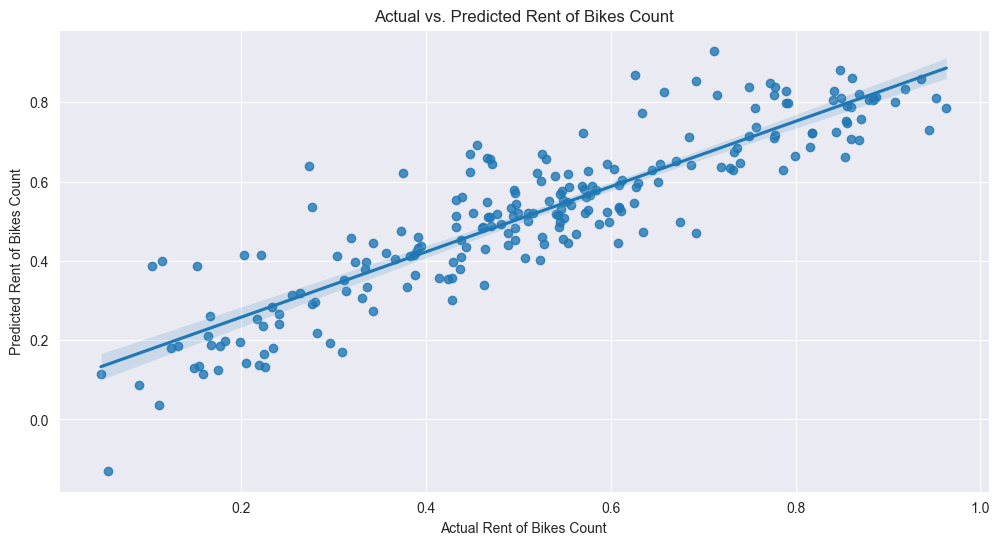

In [235]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

### Above Scatter Plot Shows the Linear Relationship between Actual Rent of Bikes Count and Predicted Rent of Bikes Count.

In [236]:
# Checking the Accuracy of the Test Model
from sklearn.metrics import r2_score

r2=r2_score(y_test,y_test_pred)
print(r2)

0.7922903615623922


In [237]:
Cofficients = round(lm5.params,2)
beta = Cofficients.sort_values(ascending = False)
beta

temp                0.57
year                0.23
winter              0.13
sep                 0.09
summer              0.08
july               -0.04
sun                -0.05
Misty              -0.08
windspeed          -0.16
Light_snowrain     -0.28
const            -468.91
dtype: float64

## Equation of Best Fit Line :

### cnt = 0.57 * temp + 0.23 * yr + 0.13 * winter + 0.09 * sep + 0.8 * summer - 0.04 * july - 0.05 * sun - 0.08 * Misty - 0.16 * windspeed - 0.28 * Light_snowrain - 468.91

In [238]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7604


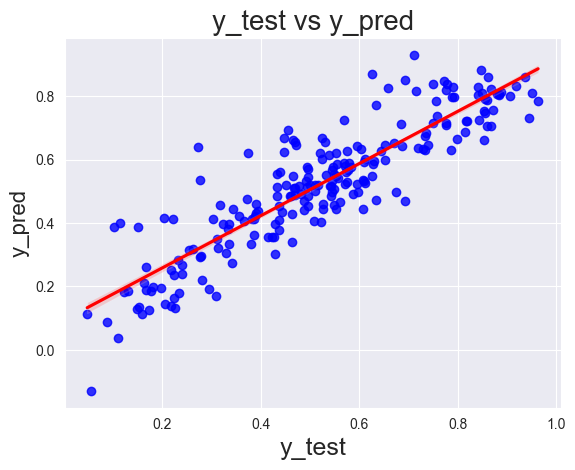

In [239]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.833
- Test dataset R^2           : 0.7922
- Train dataset Adjusted R^2 : 0.829    
- Test dataset Adjusted R^2  : 0.760

#### Demand of bikes depend on year, temp, winter, summer,Misty,windspeed,Light_snowrain.